In [1]:
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
b19df = pd.read_csv('B19 Mapped Dust Outputs/B19_Master_DF2.csv')
#b19df = b19df.drop(b19df.columns[0], axis=1)

fitcoord_df = pd.read_csv('fitcoord csvs/codarkfulldfII (3).csv')

b19df

lat_b19 = b19df['l'].to_numpy()

In [3]:
fitcoord_df

,Unnamed: 0.1,Unnamed: 0,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
0,0,1,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,128.081920,0.290790,Polaris,F
1,1,2,119070,2800,HI,2,6.805908,0.134199,-9.986011,0.218256,11.427903,0.200721,281.405440,0.755494,Polaris,F
2,2,3,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F
3,3,4,119070,2800,67,2,0.002166,0.134199,0.925883,0.218256,0.925883,0.200721,0.002390,0.000081,Polaris,T
4,4,5,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,0.106663,0.004928,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,7,8,156540,3513,CO,2,0.126297,0.315815,-3.047263,0.079078,0.781650,0.084907,0.086818,0.006661,Ursa Major,T
216,0,1,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,134.853120,4.547945,Ursa Major,F
217,1,2,156640,3250,67,1,0.001190,0.001864,-0.204542,3.671439,-2.028824,3.671440,0.000000,0.000000,Ursa Major,F
218,2,3,156640,3250,65,1,0.002425,0.001370,0.949289,2.455072,3.763955,2.455072,0.023622,0.006867,Ursa Major,F


In [4]:
b19df

,l,b,Max Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3]
0,125.22,32.50,0.238035,[347.47474747],17.049214,1.975690e+21,37.554663
1,146.07,17.75,0.801172,[206.06060606],-4.290761,6.649730e+21,-502.249007
2,151.50,19.25,0.167801,[184.84848485],-10.701696,1.392750e+21,-42.176451
3,156.54,35.13,0.101050,[248.48484848],11.424673,8.387140e+20,23.791376
4,147.20,40.75,0.261187,[213.13131313],8.876491,2.167851e+21,79.147556
5,148.21,23.50,0.156388,[184.84848485],16.406510,1.298019e+21,25.639778
6,125.50,22.00,0.145759,[290.90909091],15.925422,1.209802e+21,24.619145
7,143.00,38.50,0.333702,[368.68686869],7.726345,2.769729e+21,116.175009
8,119.21,20.00,0.111059,[312.12121212],12.935086,9.217907e+20,23.094708
9,137.16,43.00,0.054640,[177.77777778],6.567824,4.535160e+20,22.377963


In [5]:
#filtering fitcoord dataframe
fitcoord_df_filtered = fitcoord_df[fitcoord_df['Upper Limit'] == 'F']
#assigning OH67 only
OH67_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == '67']
OH67_NoUpLim_df = OH67_NoUpLim_df[OH67_NoUpLim_df['comp'] == 1] #only use first gaussian components
#gathering FWHM into numpy array
FWHM67_NoUpLim_arr = OH67_NoUpLim_df['FWHM (km/s)'].to_numpy()
#trim array (fix this later, dimensions are wrong)
#FWHM67_trim = FWHM67_NoUpLim_arr[:-1]

#filtering bayestar dataframe
cloud_depth = b19df['FWHM [pc]'].to_numpy() #depth is FWHM
voldens = b19df['Volume Density [cm^-3]'].to_numpy()
#cloud_depth
OH67_NoUpLim_df
#print(len(cloud_depth))
#print(len(FWHM67_NoUpLim_arr))

OH67_lat = OH67_NoUpLim_df['l (deg)'].to_numpy()

WOH67 = OH67_NoUpLim_df['integral'].to_numpy()


#CO Dataframe
CO_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == 'CO']
CO_NoUpLim_df = CO_NoUpLim_df[CO_NoUpLim_df['comp'] == 1]
WCO = CO_NoUpLim_df['integral'].to_numpy()


#max Av array
max_Av_arr = b19df['Max Av [mag]'].to_numpy()

#coldens array
col_dens = b19df['Column Density [cm^-2]'].to_numpy()

In [6]:
lat_b19_scaled = np.round(b19df['l'] * 1000).astype(int)
OH67_lat_scaled = np.round(OH67_NoUpLim_df['l (deg)']).astype(int)

missing = set(lat_b19_scaled)-set(OH67_lat_scaled)
print(missing)

set()


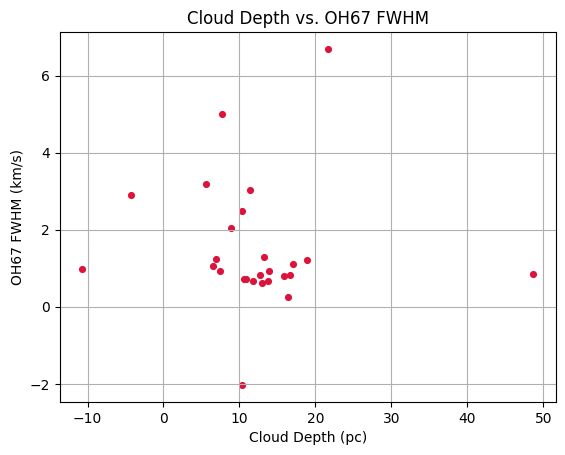

In [7]:
#Plot for depth v. FWHM

plt.scatter(cloud_depth, FWHM67_NoUpLim_arr, s=17, color = 'crimson')
plt.xlabel('Cloud Depth (pc)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Cloud Depth vs. OH67 FWHM')
plt.grid(True)

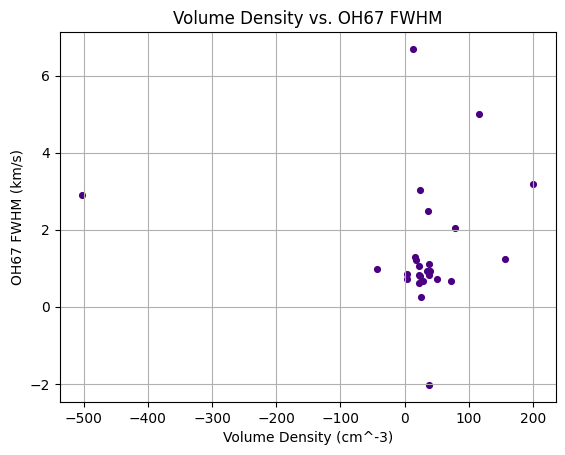

In [8]:
#Plot for depth v. FWHM

plt.scatter(voldens, FWHM67_NoUpLim_arr, s=17, color = 'indigo')
plt.xlabel('Volume Density (cm^-3)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Volume Density vs. OH67 FWHM')
plt.grid(True)

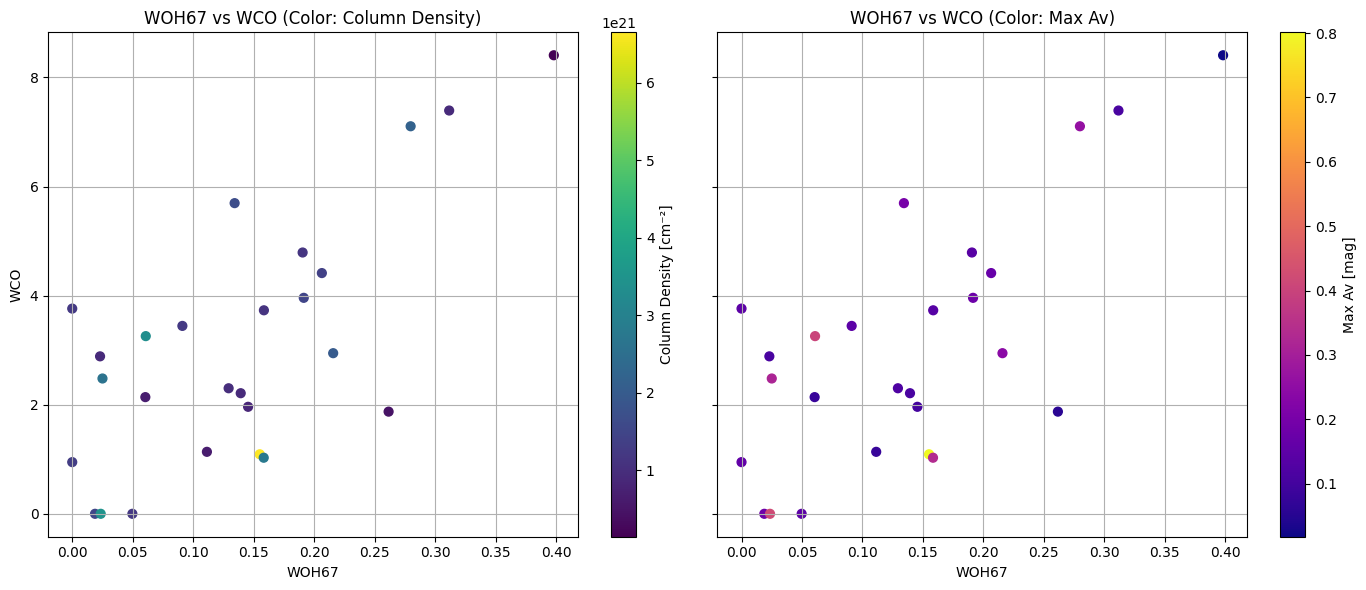

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot 1: Color by Column Density
sc1 = ax1.scatter(WOH67, WCO, c=col_dens, cmap='viridis', s=40)
cb1 = fig.colorbar(sc1, ax=ax1)
cb1.set_label('Column Density [cm⁻²]')
ax1.set_title('WOH67 vs WCO (Color: Column Density)')
ax1.set_xlabel('WOH67')
ax1.set_ylabel('WCO')
ax1.grid(True)

# Plot 2: Color by Max Av
sc2 = ax2.scatter(WOH67, WCO, c=max_Av_arr, cmap='plasma', s=40)
cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Max Av [mag]')
ax2.set_title('WOH67 vs WCO (Color: Max Av)')
ax2.set_xlabel('WOH67')

plt.grid(True)
plt.tight_layout()
plt.show()